In [1]:
import pandas as pd

DATASET_PATH = "D:\emotion-drift-project\data\merged_eye.csv"  # Kaggle or local

df = pd.read_csv(DATASET_PATH, nrows=100_000)  # load only first chunk
df.head()


C:\Users\Asus\AppData\Local\Temp\ipykernel_7384\3350976557.py:5: DtypeWarning: Columns (0: Event, 1: Event value) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATASET_PATH, nrows=100_000)  # load only first chunk


,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,source_file
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,EyeT_group_dataset_III_image_name_letter_card_...
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,EyeT_group_dataset_III_image_name_letter_card_...
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,EyeT_group_dataset_III_image_name_letter_card_...
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,EyeT_group_dataset_III_image_name_letter_card_...
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN,EyeT_group_dataset_III_image_name_letter_card_...


In [2]:
df.shape

(100000, 72)

In [3]:
df.columns
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           100000 non-null  int64  
 1   Recording timestamp                  100000 non-null  int64  
 2   Computer timestamp                   100000 non-null  int64  
 3   Sensor                               99956 non-null   str    
 4   Project name                         100000 non-null  str    
 5   Export date                          100000 non-null  str    
 6   Participant name                     100000 non-null  str    
 7   Recording name                       100000 non-null  str    
 8   Recording date                       100000 non-null  str    
 9   Recording date UTC                   100000 non-null  str    
 10  Recording start time                 100000 non-null  str    
 11  Recording start time UTC 

In [4]:
df.isnull().sum()

Unnamed: 0                        0
Recording timestamp               0
Computer timestamp                0
Sensor                           44
Project name                      0
                              ...  
Fixation point X (MCSnorm)    66820
Fixation point Y (MCSnorm)    66820
Mouse position X              99008
Mouse position Y              99008
source_file                       0
Length: 72, dtype: int64

In [5]:
KEEP_COLUMNS = [
    "Participant name",
    "Recording name",
    "Recording timestamp",
    "Eyetracker timestamp",
    "Gaze point X",
    "Gaze point Y",
    "Validity left",
    "Validity right",
    "Eye movement type",
    "Gaze event duration",
    "source_file",
    "Gaze direction left X",
    "Gaze direction left Y",
    "Gaze direction left Z",
    "Gaze direction right X",
    "Gaze direction right Y",
    "Gaze direction right Z",
    "Eye position left X (DACSmm)",
    "Eye position left Y (DACSmm)",
    "Eye position left Z (DACSmm)",
    "Eye position right X (DACSmm)",
    "Eye position right Y (DACSmm)",
    "Eye position right Z (DACSmm)",
]


In [6]:
df = df[KEEP_COLUMNS]
df.shape


(100000, 23)

In [7]:
df.isna().sum().sort_values(ascending=False)


Gaze direction right Z           16981
Gaze direction right Y           16981
Eye position right X (DACSmm)    16981
Eye position right Z (DACSmm)    16981
Gaze direction right X           16981
Eye position right Y (DACSmm)    16981
Gaze direction left X            16967
Gaze direction left Y            16967
Eye position left X (DACSmm)     16967
Eye position left Y (DACSmm)     16967
Eye position left Z (DACSmm)     16967
Gaze direction left Z            16967
Gaze point X                      8339
Gaze point Y                      8339
Eyetracker timestamp              1036
Validity right                    1036
Validity left                     1036
Gaze event duration                 22
Eye movement type                   22
Recording name                       0
Participant name                     0
Recording timestamp                  0
source_file                          0
dtype: int64

In [8]:
df = df.dropna(subset=["Gaze point X", "Gaze point Y"])


In [9]:
df = df[
    (df["Validity left"] == "Valid") |
    (df["Validity right"] == "Valid")
]


In [10]:
df.shape



(91661, 23)

In [11]:
df.isna().sum().sort_values(ascending=False)

Gaze direction right Z           8642
Gaze direction right Y           8642
Eye position right X (DACSmm)    8642
Eye position right Z (DACSmm)    8642
Gaze direction right X           8642
Eye position right Y (DACSmm)    8642
Gaze direction left X            8628
Gaze direction left Y            8628
Eye position left X (DACSmm)     8628
Eye position left Y (DACSmm)     8628
Eye position left Z (DACSmm)     8628
Gaze direction left Z            8628
Recording timestamp                 0
Participant name                    0
Recording name                      0
Validity left                       0
Gaze point Y                        0
Gaze point X                        0
Eyetracker timestamp                0
Validity right                      0
Eye movement type                   0
Gaze event duration                 0
source_file                         0
dtype: int64

In [12]:
df = df.dropna(subset=[
    "Eye movement type",
    "Gaze event duration"
])
df.shape

(91661, 23)

In [13]:
df = df.dropna(subset=[
    "Eyetracker timestamp",
    "Validity left",
    "Validity right"
])
df.shape

(91661, 23)

In [14]:
df.isna().sum().sort_values(ascending=False)


Gaze direction right Z           8642
Gaze direction right Y           8642
Eye position right X (DACSmm)    8642
Eye position right Z (DACSmm)    8642
Gaze direction right X           8642
Eye position right Y (DACSmm)    8642
Gaze direction left X            8628
Gaze direction left Y            8628
Eye position left X (DACSmm)     8628
Eye position left Y (DACSmm)     8628
Eye position left Z (DACSmm)     8628
Gaze direction left Z            8628
Recording timestamp                 0
Participant name                    0
Recording name                      0
Validity left                       0
Gaze point Y                        0
Gaze point X                        0
Eyetracker timestamp                0
Validity right                      0
Eye movement type                   0
Gaze event duration                 0
source_file                         0
dtype: int64

In [15]:
df.info()

<class 'pandas.DataFrame'>
Index: 91661 entries, 2 to 99999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant name               91661 non-null  str    
 1   Recording name                 91661 non-null  str    
 2   Recording timestamp            91661 non-null  int64  
 3   Eyetracker timestamp           91661 non-null  float64
 4   Gaze point X                   91661 non-null  float64
 5   Gaze point Y                   91661 non-null  float64
 6   Validity left                  91661 non-null  str    
 7   Validity right                 91661 non-null  str    
 8   Eye movement type              91661 non-null  str    
 9   Gaze event duration            91661 non-null  float64
 10  source_file                    91661 non-null  str    
 11  Gaze direction left X          83033 non-null  str    
 12  Gaze direction left Y          83033 non-null  str    
 13  Ga

In [16]:
print(df['Gaze direction left X'].unique()[:20])


<StringArray>
['0,07366', '0,06367', '0,06370', '0,06385', '0,06698', '0,06699', '0,06972',
 '0,06976', '0,06847', '0,07627', '0,07384', '0,07316', '0,08261', '0,07360',
 '0,07769', '0,07367', '0,07381', '0,07307', '0,07346', '0,07663']
Length: 20, dtype: str


In [17]:
import numpy as np

gaze_eye_cols = [
    'Gaze direction left X',
    'Gaze direction left Y',
    'Gaze direction left Z',
    'Gaze direction right X',
    'Gaze direction right Y',
    'Gaze direction right Z',
    'Eye position left X (DACSmm)',
    'Eye position left Y (DACSmm)',
    'Eye position left Z (DACSmm)',
    'Eye position right X (DACSmm)',
    'Eye position right Y (DACSmm)',
    'Eye position right Z (DACSmm)'
]

for col in gaze_eye_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '.', regex=False)  # 🔥 FIX DECIMAL FORMAT
        .replace(['', 'nan', 'None'], np.nan)
    )
    
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [18]:
print(df[gaze_eye_cols].isnull().sum())


Gaze direction left X            8628
Gaze direction left Y            8628
Gaze direction left Z            8628
Gaze direction right X           8642
Gaze direction right Y           8642
Gaze direction right Z           8642
Eye position left X (DACSmm)     8628
Eye position left Y (DACSmm)     8628
Eye position left Z (DACSmm)     8628
Eye position right X (DACSmm)    8642
Eye position right Y (DACSmm)    8642
Eye position right Z (DACSmm)    8642
dtype: int64


In [19]:
#Interpolation
df = df.sort_values(by="Eyetracker timestamp")

df[gaze_eye_cols] = df[gaze_eye_cols].interpolate(
    method='linear',
    limit_direction='both'
)

df[gaze_eye_cols] = df[gaze_eye_cols].ffill()
df[gaze_eye_cols] = df[gaze_eye_cols].bfill()


In [20]:
print(df[gaze_eye_cols].isnull().sum())

Gaze direction left X            0
Gaze direction left Y            0
Gaze direction left Z            0
Gaze direction right X           0
Gaze direction right Y           0
Gaze direction right Z           0
Eye position left X (DACSmm)     0
Eye position left Y (DACSmm)     0
Eye position left Z (DACSmm)     0
Eye position right X (DACSmm)    0
Eye position right Y (DACSmm)    0
Eye position right Z (DACSmm)    0
dtype: int64


In [21]:
print(df[gaze_eye_cols].describe())


       Gaze direction left X  Gaze direction left Y  Gaze direction left Z  \
count           91661.000000           91661.000000           91661.000000   
mean                0.037908               0.019372              -0.989195   
std                 0.101429               0.096160               0.011268   
min                -0.300470              -0.213200              -1.000000   
25%                -0.012950              -0.069690              -0.997760   
50%                 0.023570               0.025360              -0.992600   
75%                 0.098940               0.095320              -0.984110   
max                 0.453750               0.447780              -0.859310   

       Gaze direction right X  Gaze direction right Y  Gaze direction right Z  \
count            91661.000000            91661.000000            91661.000000   
mean                 0.044990                0.003094               -0.989828   
std                  0.095635                0.094486 

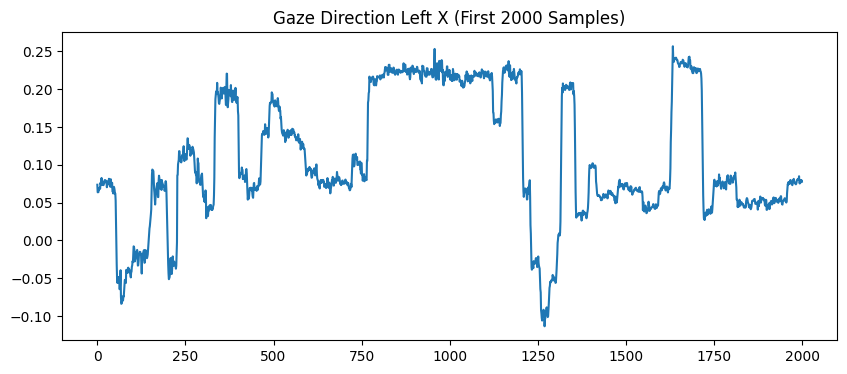

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['Gaze direction left X'].values[:2000])
plt.title("Gaze Direction Left X (First 2000 Samples)")
plt.show()


In [23]:
df.to_csv("cleaned_eyetracking_data.csv", index=False)